In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import io
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from keras.datasets import mnist

In [3]:
from datetime import datetime

In [4]:
import plotly.express as px
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#visualize the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
print(df.isnull().sum().sum())

0


# Homework 6

## Fit a random forest classifier using the full set of explanatory variables and the model training set (csv).

In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
y = df["label"]
X = df.drop("label", axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
df =  pd.read_csv('train.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
X = df.drop('label', axis=1)
y = df['label'] != 1

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
start = datetime.now()
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
end = datetime.now()
rfc_time = end-start
print(end-start)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

0:00:24.995317
Training Score: 1.0
Testing Score: 0.9961904761904762


## Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.

In [13]:
# Import Packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data= pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print("Dimensions of Data => ", data.shape)

Dimensions of Data =>  (42000, 785)


In [16]:
X=data.drop(["label"],axis=1)
y=data.label

In [18]:
pca = PCA(20)  
start = datetime.now()
Xproj = pca.fit_transform(X)
end = datetime.now()

pca_time = end - start

print(pca_time)
print(X.shape)
print(Xproj.shape)

0:00:00.856529
(42000, 784)
(42000, 20)


/var/folders/yk/ncwpcr992tlfxm1x03tn9gcw0000gn/T/ipykernel_814/462301374.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("nipy_spectral",10))


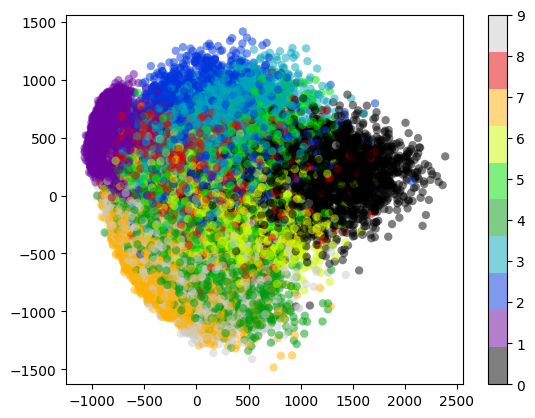

In [19]:
# Creating a scatter plot of the datapoints
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap("nipy_spectral",10))
plt.colorbar();

0:00:00.684945


Text(0, 0.5, 'Cumulative  Variance')

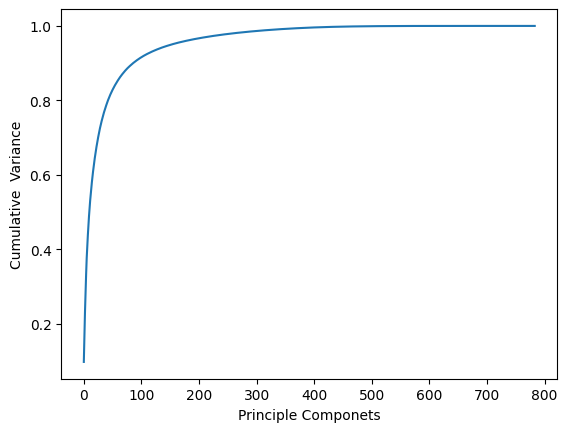

In [20]:
start = datetime.now()
pca=PCA().fit(X)
end = datetime.now()
pca_time = end-start
print(pca_time)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Componets')
plt.ylabel('Cumulative  Variance')

In [21]:
pca = PCA(250)  
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(42000, 784)
(42000, 250)


/var/folders/yk/ncwpcr992tlfxm1x03tn9gcw0000gn/T/ipykernel_814/462301374.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("nipy_spectral",10))


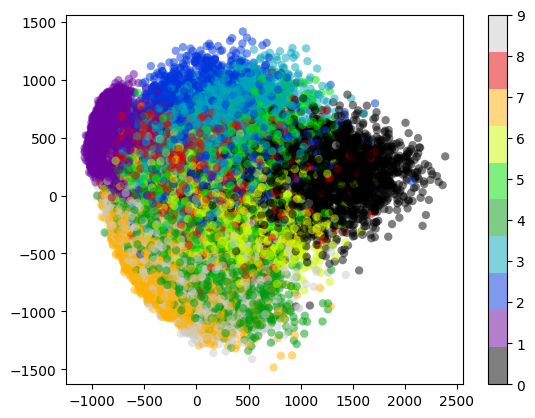

In [22]:
# Creating a scatter plot of the datapoints
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap("nipy_spectral",10))
plt.colorbar();

In [23]:
y = df["label"]
X = df.drop("label", axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
df =  pd.read_csv('train.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
X = df.drop('label', axis=1)
y = df['label'] != 1

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
clf_pca = RandomForestClassifier(random_state=1, n_estimators=250).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9961904761904762


## Apply K Means Clustering

In [28]:
testing = pd.read_csv('test.csv')

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.predict(testing)

In [30]:
i = testing.index + 1

In [31]:
i

RangeIndex(start=1, stop=28001, step=1)

In [32]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [33]:
submission = pd.DataFrame({'ImageId': i, 'Label': cluster_labels})
submission.to_csv('submission.csv', index=False)

In [34]:
cluster_labels = clf.predict(testing)

/Users/morganmccoy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [35]:
submission = pd.DataFrame({'ImageId': i, 'Label': cluster_labels})
submission.to_csv('submission_rfc.csv', index=False)

In [36]:
cluster_labels = clf_pca.predict(testing)

/Users/morganmccoy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [37]:
submission = pd.DataFrame({'ImageId': i, 'Label': cluster_labels})
submission.to_csv('submission_pca.csv', index=False)

## Cluster MNIST dataset

In [38]:
(x_train, y_train), (x_test,  y_test) = mnist.load_data()

In [39]:
X = x_train.reshape(len(x_train), -1)
Y = y_train

X = X.astype(float)/ 255.


In [40]:
from sklearn.cluster import MiniBatchKMeans

In [41]:
n_digits = len(np.unique(y_test))

print(n_digits)

10


In [42]:
kmeans = MiniBatchKMeans(n_clusters=n_digits)

kmeans.fit(X)
kmeans.labels_

array([2, 4, 1, ..., 2, 8, 5], dtype=int32)

In [43]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels

In [44]:
def infer_data_lables(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

In [45]:
cluster_labels =  infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_lables(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])


[8 0 4 1 9 7 1 8 1 7 8 1 3 6 1 7 4 7 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [46]:
from sklearn.metrics import r2_score

r2_score(Y, predicted_labels)

0.10071517234138383

In [47]:
cluster_labels = kmeans.predict(testing)

/Users/morganmccoy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [48]:
submission = pd.DataFrame({'ImageId': i, 'Label': cluster_labels})
submission.to_csv('submission_kmeans.csv', index=False)

# Homework 7

## Refined EDA

## Conduct Design of Experiments to evaluate the performance of various neural networks by changing the layers and nodes. Tested neural network structures should be explored within a benchmark experiment, a 2x2 completely crossed design.

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import itertools

In [55]:
df =  pd.read_csv('train.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
X = df.drop('label', axis=1)
y = df['label'] != 1

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Define the neural network structures
structures = [
    {'layers': 2, 'nodes': 32},
    {'layers': 2, 'nodes': 64},
    {'layers': 4, 'nodes': 32},
    {'layers': 4, 'nodes': 64}
]

# Function to create and train a neural network
def create_and_train_model(layers, nodes, X_train, y_train, X_test, y_test):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
    for _ in range(layers):
        model.add(layers.Dense(nodes, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred_classes)
    return accuracy

In [58]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for structure in structures:
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        accuracy = create_and_train_model(structure['layers'], structure['nodes'], X_train, y_train, X_test, y_test)
        accuracies.append(accuracy)
    
    avg_accuracy = np.mean(accuracies)
    results.append({'structure': structure, 'accuracy': avg_accuracy})


KeyError: "None of [Index([    0,     2,     3,     5,     6,     8,     9,    10,    11,    12,\n       ...\n       41987, 41988, 41989, 41990, 41991, 41995, 41996, 41997, 41998, 41999],\n      dtype='int64', length=33600)] are in the [columns]"

## Provide a multi-class confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[], yticklabels=[])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_true' is not defined